<a href="https://colab.research.google.com/github/dawud-shakir/prof_trilce_notebooks/blob/main/linearRegressionWGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook based on tutorial Keep it simple! How to understand Gradient Descent algorithm by **Jahnavi Mahanta**

https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html

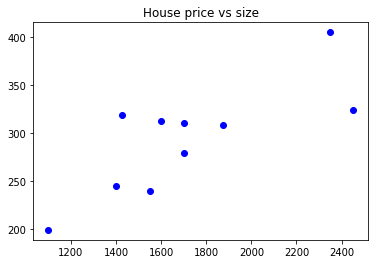

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# x is size of a house in sq/ft
x = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
# y is price in thousand dollars
y = np.array([245,  312,   279, 308,   199, 240,  405,   324,  319,  310])

plt.plot(x, y, 'ob')

plt.title("House price vs size")
plt.show()

The task – for a new house, given its size (X), what will its price (Y) be? or what is the predicted value Ypred?

If we fit a linear model we have: **ypred = w0+w1x**


The difference between **y** and **ypred** is the prediction error

So, we need to find a line with optimal values of **w0,w1**  that best fits the historical data by reducing the prediction error and improving prediction accuracy.

```
Sum of Squared Errors (SSE) = ½ Sum (Actual House Price – Predicted House Price)^2 =  ½ Sum(Y – Ypred)^2
```

(Please note that there are other measures of Error. SSE is just one of them.)


This is where Gradient Descent is useful. Gradient descent finds the optimal weights (w0,w1) that reduces the prediction error.

## Gradient Descent algorithm:

1.    Initialize the weights(w0 & w1) with random values and calculate Error (SSE)
2.   Calculate the gradient i.e. change in SSE when the weights (w0 & w1) are changed by a very small value from their original randomly initialized value. This helps us move the values of w0 & w1 in the direction in which SSE is minimized.
3.   Adjust the weights with the gradients to reach the optimal values where SSE is minimized
4.   Use the new weights for prediction and to calculate the new SSE
5.   Repeat steps 2 and 3 till further adjustments to weights doesn’t significantly reduce the Error

[[0.22222222 0.22330097]
 [0.37037037 0.54854369]
 [0.44444444 0.38834951]
 [0.57407407 0.52912621]
 [0.         0.        ]
 [0.33333333 0.19902913]
 [0.92592593 1.        ]
 [1.         0.60679612]
 [0.24074074 0.58252427]
 [0.44444444 0.53883495]]


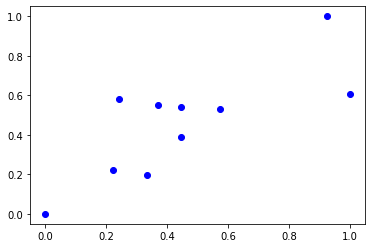

In [ ]:
# But before that, we have to normalize the data as it makes the optimization process faster.
from __future__ import division

xs=(x-min(x))/(max(x)-min(x))
ys=(y-min(y))/(max(y)-min(y))

print(np.c_[xs, ys])
# normalized x and y
plt.plot(xs,ys,'ob')
plt.show()

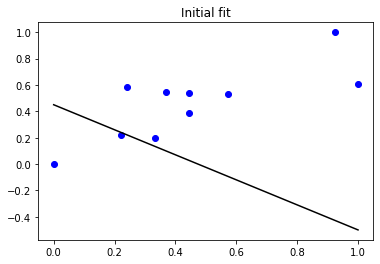

[0.  0.5 1. ]
[ 0.45  -0.025 -0.5  ]


In [ ]:
# initialize weights randomly, lets say
w0 = 0.45
w1 = -0.95

ypred= w0+w1*xs

x1=np.array([0, 0.5, 1])
y1=w0+w1*x1
plt.plot(xs,ys,'ob')
plt.plot(x1,y1,'-k')
plt.title("Initial fit")
plt.show()

print(x1)
print(y1)


Step 2: Calculate the error gradient w.r.t the weights

The error function: sum of square errors is SSE=½ (ys-ypred)^2 = ½(ys-(w0+w1*xs))^2

∂SSE/∂w0 = – (ys-ypred)

∂SSE/∂w1 = – (ys-ypred)*xs

∂SSE/∂w0 and ∂SSE/∂w1 are the gradients and they give the direction of the movement of w0,w1 w.r.t to SSE.

In [ ]:
dedw0 = -(ys-ypred)
dedw1 = -(ys-ypred)*xs

print(np.c_[xs, ys, dedw0, dedw1])
# standarized x, y, dSSE/dw0, dSSE/dw1

print ('\nTotals:')
# sum of dSSE/dw0
print(sum(dedw0))

# sum of dSSE/dw0
print(sum(dedw1))


[[ 0.22222222  0.22330097  0.01558792  0.00346398]
 [ 0.37037037  0.54854369 -0.45039554 -0.16681316]
 [ 0.44444444  0.38834951 -0.36057174 -0.16025411]
 [ 0.57407407  0.52912621 -0.62449658 -0.3585073 ]
 [ 0.          0.          0.45        0.        ]
 [ 0.33333333  0.19902913 -0.06569579 -0.0218986 ]
 [ 0.92592593  1.         -1.42962963 -1.32373114]
 [ 1.          0.60679612 -1.10679612 -1.10679612]
 [ 0.24074074  0.58252427 -0.36122798 -0.08696229]
 [ 0.44444444  0.53883495 -0.51105717 -0.22713652]]

Totals:
-4.4442826321467095
-3.448635249776925


We need to update the random values of w0,w1 so that we move in the direction of optimal w0, w1.

Update rules:

w0 – ∂SSE/∂w0
w1 – ∂SSE/∂w1

Then

New w0 = w0 – eta * ∂SSE/∂w0 = 0.45-0.1*3.300 = **0.41**

New w1 = w1 – eta * ∂SSE/∂w1= 0.75-0.1*1.545 = **0.73**

Here, eta is the learning rate = 0.01, which is the pace of adjustment to the weights.

Step 4:Use new w0 and w1 for prediction and to calculate new Total SSE

0.4944428263214671
-0.9155136475022307


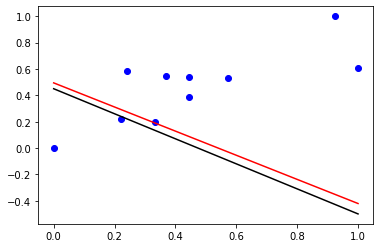

In [ ]:
eta = 0.01

w0 = w0 - eta * sum(dedw0)

w1 = w1 - eta * sum(dedw1)

print(w0)
print(w1)


y2=w0+w1*x1
plt.plot(xs,ys,'ob')
plt.plot(x1,y1,'-k')
plt.plot(x1,y2,'-r')
plt.show()




Step 5: Repeat step 3 and 4 until further adjustments to w0 and w1 doesn’t significantly reduce the error.

0.7047784229277665
-0.6902024198416721


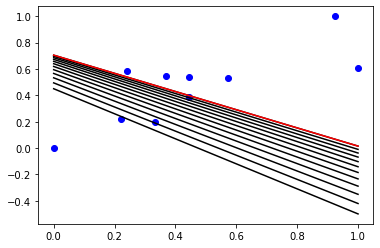

In [ ]:

plt.plot(xs,ys,'ob')
plt.plot(x1,y1,'-k')
plt.plot(x1,y2,'-k')

for i in range(10):
  ypred = w0 + w1 * xs
  dedw0 = -(ys-ypred)
  dedw1 = -(ys-ypred)*xs
  w0 = w0 - eta * sum(dedw0)
  w1 = w1 - eta * sum(dedw1)
  y2 = w0 + w1 * x1
  plt.plot(x1,y2,'-k')

plt.plot(x1,y2,'-r')
print(w0)
print(w1)


plt.show()



## Effects of Learning Rate

In [ ]:

def gradient_descent(xs,ys,w0,w1,eta,num_iter):
  plt.plot(xs,ys,'ob')
  err0=[]
  err1=[]
  loss=[]

  for i in range(num_iter):
    ypred = w0 + w1 * xs
    dedw0 = -(ys-ypred)
    dedw1 = -(ys-ypred)*xs
    w0 = w0 - eta * sum(dedw0)
    w1 = w1 - eta * sum(dedw1)
    y2 = w0 + w1 * x1
    plt.plot(x1,y2,'-k')
    err0.append(sum(dedw0))
    err1.append(sum(dedw1))
    loss.append((0.5*len(xs))*sum(ys-(w0+w1*xs))**2)

  # plot the fit
  plt.plot(x1,y2,'-r')
  plt.title("Line fit")
  plt.show()

  # plot the loss
  plt.plot(loss)
  plt.title("Loss over iterations")
  plt.show()

  # plot errors
  fig, ax = plt.subplots()
  ax.set_xlabel('iteration')
  ax.set_ylabel('error')
  line1, = ax.plot(err0, label='change in w0')
  line2, = ax.plot(err1, label='change in w1')
  ax.legend(handles=[line1, line2])
  fig.tight_layout()
  plt.show()

  print(loss[-1])
  print(w0)
  print(w1)

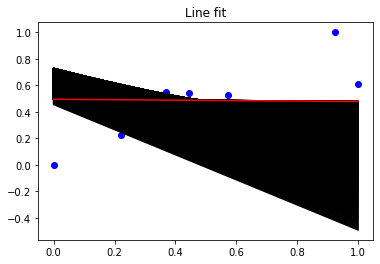

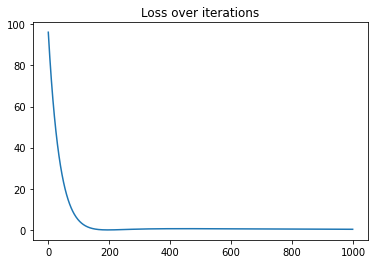

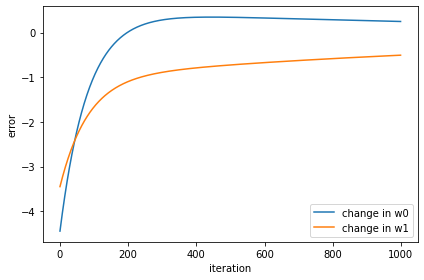

0.3075653839404313
0.4939766060982711
-0.01651673575161843


In [ ]:
w0 = 0.45
w1 = -0.95
eta = 0.001
num_iter =1000

gradient_descent(xs,ys,w0,w1,eta,num_iter)

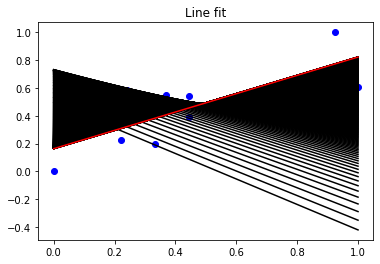

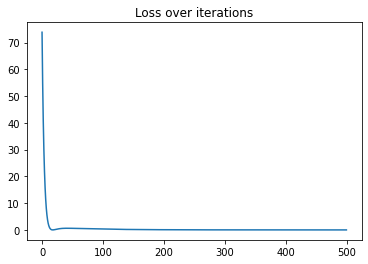

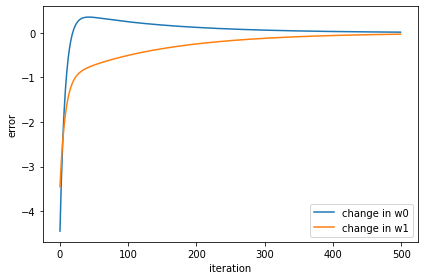

0.0010674128223054273
0.16282365231540954
0.659168643022024


In [ ]:
w0 = 0.45
w1 = -0.95
eta = 0.01
num_iter = 500

gradient_descent(xs,ys,w0,w1,eta,num_iter)


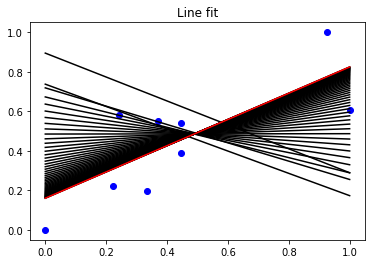

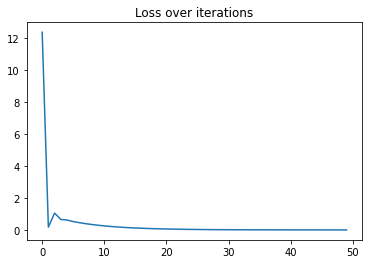

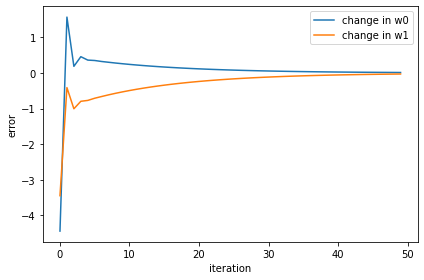

0.0008431848793538572
0.16051832904292346
0.6638723986756894


In [ ]:
w0 = 0.45
w1 = -0.95
eta = 0.1
num_iter =50

gradient_descent(xs,ys,w0,w1,eta,num_iter)


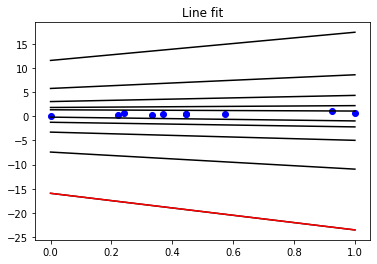

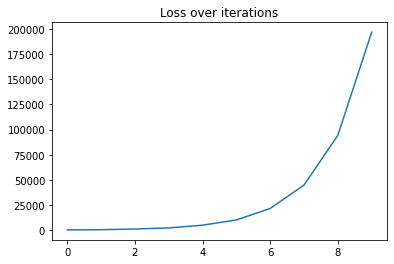

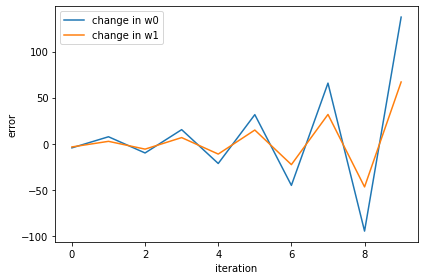

196632.7505088528
-15.922461805270522
-7.566169516803829


In [ ]:
w0 = 0.45
w1 = -0.95
eta = 0.2
num_iter = 10

gradient_descent(xs,ys,w0,w1,eta,num_iter)


## Participation

*Open the notebook in playground mode so that you can run it and modify it. File > open in playground mode*

For participation I only require you to play with the hyperparameters (eta,number of iterations) to see what happens with the loss function, or how do they affect efficieny/accuracy. Take a screenshot or download the pfd and upload in learn


Other things to try if you have time/energy:
* Set an epsilon and make the GD stop when the loss is less than the epsilon value
* Modify the gradient descent function to execute as stochastic gradient descent. Play with the hyperparameters and contrast its performance with the batch version
* Add regularization and play with lamda to see its effects